# Clasificación de Sentimientos Utilizando Regresión Lógistica

Realizado por:
- Paula Monge
- Emmanuel Zúñiga

Trabajo de Invetigación del Curso:
- Investigación en Ciencias de la Computación

Tema de Investigación:
- Aprendizaje Automático en la clasificación de Sentimientos en Twitter: Comparación de los Algoritmos de LSTM Bidireccional, BERT y Naïve Bayes

## Importación de librerias 📚

In [ ]:
!pip install unidecode
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from unidecode import unidecode
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score as acc
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud
import seaborn as sns

## Carga del Dataset

In [ ]:
# Se carga la libreria drive de google para cargar los archivos almacenados en drive
drive.mount("/content/gdrive")

# El dataset en cuestión contiene datos sobre tweets en diferentes idiomas, pero nos interesa utilizar solo
# los que se encuentran en español.
tweets = pd.read_csv('/content/gdrive/My Drive/tweets.csv').query('Language == "es"')

Observamos los primeros 10 registros del dataset

In [ ]:
tweets.head(10)

,Text,Language,Label
1,#BadBunny: Como dos gotas de agua: Joven se di...,es,negative
36,"@alitomorenoc No mames, ya mejor lárgate del P...",es,litigious
173,"Good MEWning ♥️🐼♥️\nUn nuevo amanecer,un nuevo...",es,positive
330,criminal por robarme el corazón https://t.co/O...,es,litigious
455,@isiupdates Pantera \n#IsiVives #IsiVivesCHILE...,es,positive
556,Os quiero recordar y hacer saber a los que aún...,es,positive
572,@Orlando71156528 Y sin embargo un criminal de ...,es,litigious
702,@Fergus0055 No sería porque los tóxicos de xbo...,es,positive
812,@loonalendaskk ahh q legal,es,litigious
823,@JesusRCuevas @lopezobrador_ Pues no lamenta l...,es,litigious


## Preprocesamiento y Limpieza de Datos 🧹

In [ ]:
def remove_emoji(string):
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', string) 

def clean_tweet(tweet):
    if type(tweet) == float:
        return ""
    temp = tweet.lower()
    temp = unidecode(temp)
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_ÑÁÉÍÓÚ]+","", temp)
    temp = re.sub("#","", temp)
    temp = remove_emoji(temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-zA-Z0-9ñáéíóú]"," ", temp)
    return temp
    
## Una vez creadas las funciones se procede a realizar la limpieza de los tweets
tweets['Clean'] = tweets['Text'].map(lambda x : clean_tweet(x))

Verificamos si la limpieza se ha realizado correctamente

In [ ]:
tweets.head(10)

,Text,Language,Label,Clean
1,#BadBunny: Como dos gotas de agua: Joven se di...,es,negative,badbunny como dos gotas de agua joven se dis...
36,"@alitomorenoc No mames, ya mejor lárgate del P...",es,litigious,no mames ya mejor largate del pri y deja de ...
173,"Good MEWning ♥️🐼♥️\nUn nuevo amanecer,un nuevo...",es,positive,good mewning un nuevo amanecer un nuevo dia u...
330,criminal por robarme el corazón https://t.co/O...,es,litigious,criminal por robarme el corazon
455,@isiupdates Pantera \n#IsiVives #IsiVivesCHILE...,es,positive,pantera isivives isiviveschile kcamexico
556,Os quiero recordar y hacer saber a los que aún...,es,positive,os quiero recordar y hacer saber a los que aun...
572,@Orlando71156528 Y sin embargo un criminal de ...,es,litigious,y sin embargo un criminal de esa calana esta ...
702,@Fergus0055 No sería porque los tóxicos de xbo...,es,positive,no seria porque los toxicos de xbox y hasta s...
812,@loonalendaskk ahh q legal,es,litigious,ahh q legal
823,@JesusRCuevas @lopezobrador_ Pues no lamenta l...,es,litigious,pues no lamenta la muerte de miles de ninos ...


## Análisis Exploratorio 📊


Agrupamos las clases para determinar las frecuencias en el dataset

<Axes: xlabel='Label'>

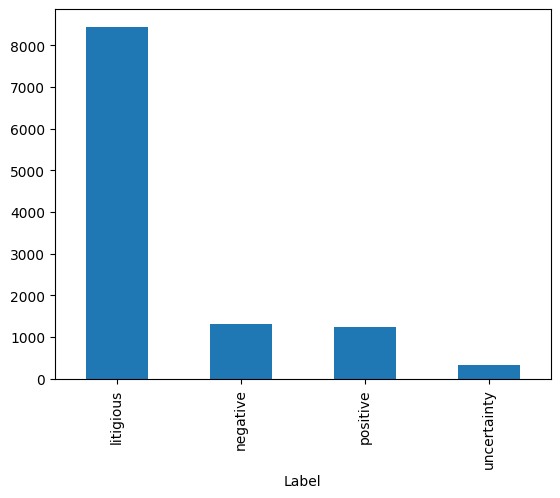

In [ ]:
tweets.groupby(['Label']).size().plot.bar()

Por lo tanto, vemos que la gran mayoría de los datos estan en la clase litigious, mientras que los tweets con connotaciones negative, positive y uncertainty poseen frecuencias similares.

## Creación del Modelo de Regresión Lógistica 📈


In [ ]:
x = tweets["Clean"]
y = tweets["Label"]

In [ ]:
model = Pipeline((("vect", TfidfVectorizer()),("clc", LogisticRegression(max_iter=600))))
xTrain = x.head(int(50000 * 0.9))
xTest =  x.tail(int(50000 * 0.1))
yTrain = y.head(int(50000*0.9))
yTest =  y.tail(int(50000 * 0.1))
model.fit(xTrain,yTrain)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clc', LogisticRegression(max_iter=600))])

In [ ]:
Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clc', LogisticRegression(max_iter=600))])

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clc', LogisticRegression(max_iter=600))])

In [ ]:
accuracy = (acc(model.predict(xTest), yTest))
print("Accuracy :- ", accuracy)
yPrediction = model.predict(xTest)

Accuracy :-  0.9634


Para probar el modelo debe de ingresarse un texto en las comillas simples ubicadas dentro de los corchetes, posteriormente el modelo determinará la clase del texto introducido.

In [ ]:
print(model.predict(['socorro jesús me voy a matar']))

['negative']
